Fariz Muhammad Rizky - 1301184327

# Downloading and Prepping Data <a id="2"></a>

Import primary modules.

In [1]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library

import matplotlib.pyplot as plt

Download the dataset and read it into a *pandas* dataframe.

In [2]:
df_can = pd.read_excel('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Canada.xlsx',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2
                      )

print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


Clean up data. We will make some modifications to the original dataset to make it easier to create our visualizations. Refer to *Introduction to Matplotlib and Line Plots* and *Area Plots, Histograms, and Bar Plots* for a detailed description of this preprocessing.

In [3]:
# clean up the dataset to remove unnecessary columns (eg. REG) 
df_can.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis=1, inplace=True)

# let's rename the columns so that they make sense
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace=True)

# for sake of consistency, let's also make all column labels of type string
df_can.columns = list(map(str, df_can.columns))

# set the country name as index - useful for quickly looking up countries using .loc method
df_can.set_index('Country', inplace=True)

# add total column
df_can['Total'] = df_can.sum(axis=1)

# years that we will be using in this lesson - useful for plotting later on
years = list(map(str, range(1980, 2014)))
print('data dimensions:', df_can.shape)

data dimensions: (195, 46)


**Question 1:** Using a pie chart, explore the proportion (percentage) of new immigrants grouped by continents in the year 2013.

**Note**: You might need to play with the explore values in order to fix any overlapping slice values.

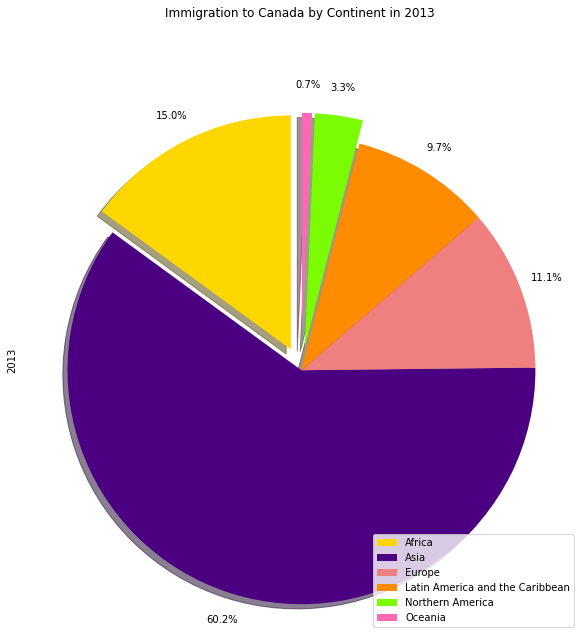

In [4]:
df_continents = df_can.groupby('Continent', axis=0).sum()

color_list = ['gold', 'indigo', 'lightcoral', 'darkorange', 'lawngreen', 'hotpink']
explode_list = [0.1, 0, 0, 0, 0.1, 0.1] 
df_continents['2013'].plot(kind='pie',
                            figsize=(10, 10),
                            autopct='%1.1f%%',   
                            startangle=90,        
                            shadow = True,
                            labels=None,         
                            pctdistance=1.12,   
                            colors = color_list,
                            explode=explode_list  
                            )

# scale the title up by 12% to match pctdistance
plt.title('Immigration to Canada by Continent in 2013', y=1.12) 
plt.axis('equal') 

# add legend
plt.legend(labels=df_continents.index, loc='lower right') 

plt.show()

**Question 2:** Compare the distribution of the number of immigrants from Pakistan and Afghanistan from 1980 to 2013.

Step 1: Get the dataset for Pakistan and Afghanistan and call the dataframe **df_PA**.

In [5]:
years = list(map(str, range(1980, 2013)))
df_PA = df_can.loc[['Pakistan','Afghanistan'],years].transpose()

df_PA

Country,Pakistan,Afghanistan
1980,978,16
1981,972,39
1982,1201,39
1983,900,47
1984,668,71
1985,514,340
1986,691,496
1987,1072,741
1988,1334,828
1989,2261,1076


Step 2: Plot data.

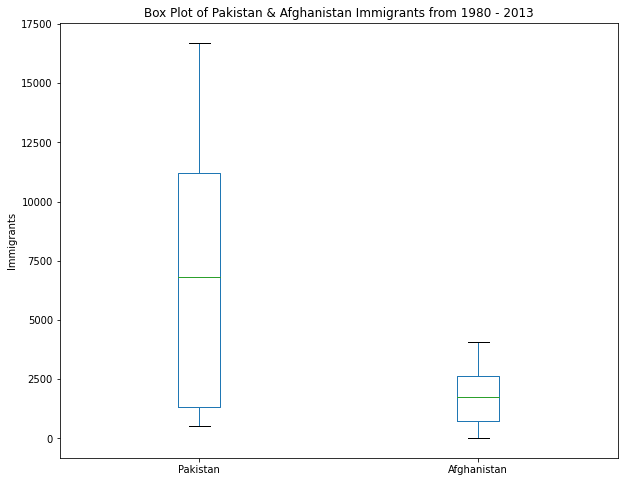

In [6]:
df_PA.plot(kind="box", figsize=(10,8))

plt.title("Box Plot of Pakistan & Afghanistan Immigrants from 1980 - 2013")
plt.ylabel("Immigrants")

plt.show()

**Question 3**: Create a scatter plot of the total immigration from Denmark, Norway, and Sweden to Canada from 1980 to 2013?

Step 1: Get the data:
   1. Create a dataframe the consists of the numbers associated with Denmark, Norway, and Sweden only. Name it **df_countries**.
   2. Sum the immigration numbers across all three countries for each year and turn the result into a dataframe. Name this new dataframe **df_total**.
   3. Reset the index in place.
   4. Rename the columns to **year** and **total**.
   5. Display the resulting dataframe.

In [7]:
df_countries = df_can.loc[["Denmark", "Norway", "Sweden"],years].transpose()
df_total = pd.DataFrame(df_countries.sum(axis=1))
df_total.reset_index(inplace=True)
df_total.columns = ["year", "total"]
df_total["year"] = df_total["year"].astype(int)

df_total

,year,total
0,1980,669
1,1981,678
2,1982,627
3,1983,333
4,1984,252
5,1985,285
6,1986,336
7,1987,387
8,1988,373
9,1989,387


Step 2: Generate the scatter plot by plotting the total versus year in **df_total**.

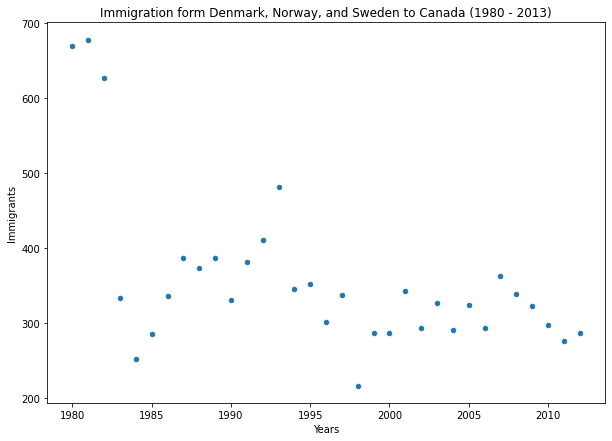

In [8]:
df_total.plot(kind="scatter", x="year", y="total", figsize=(10,7))

plt.title("Immigration form Denmark, Norway, and Sweden to Canada (1980 - 2013)")
plt.xlabel("Years")
plt.ylabel("Immigrants")

plt.show()

**Question 4**: Previously in this lab, we created box plots to compare immigration from China and India to Canada. Create bubble plots of immigration from China and India to visualize any differences with time from 1980 to 2013. You can use **df_can_t** that we defined and used in the previous example.

Step 1: Normalize the data pertaining to China and India.

In [9]:
df_can_t = df_can[years].transpose()
df_can_t.index = map(int, df_can_t.index)
df_can_t.index.name = "Years"
df_can_t.reset_index(inplace=True)

norm_china = (df_can_t["China"] - df_can_t["China"].min()) / (df_can_t["China"].max() - df_can_t["China"].min())
norm_india = (df_can_t["India"] - df_can_t["India"].min()) / (df_can_t["India"].max() - df_can_t["India"].min())

Step 2: Generate the bubble plots.

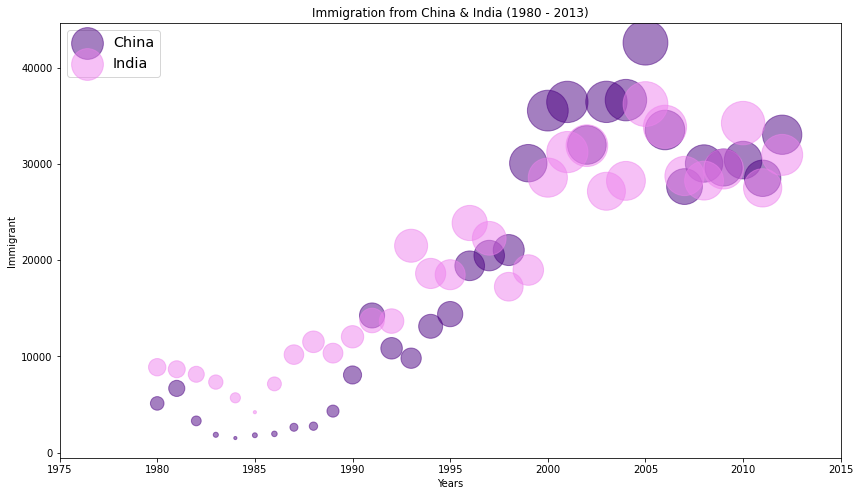

In [10]:
# China
ax0 = df_can_t.plot(kind='scatter',
                    x='Years',
                    y='China',
                    figsize=(14, 8),
                    alpha=0.5,                  
                    color='indigo',
                    s=norm_china * 2000 + 10,   
                    xlim=(1975, 2015)
                   )

# India
ax1 = df_can_t.plot(kind='scatter',
                    x='Years',
                    y='India',
                    alpha=0.5,
                    color="violet",
                    s=norm_india * 2000 + 10,
                    ax = ax0
                   )

ax0.set_ylabel('Immigrant')
ax0.set_title('Immigration from China & India (1980 - 2013)')
ax0.legend(['China', 'India'], loc='upper left', fontsize='x-large')

# Thank you for completing this lab!

<hr>

Copyright &copy; 2019 [Cognitive Class](https://cognitiveclass.ai/?utm_source=bducopyrightlink&utm_medium=dswb&utm_campaign=bdu). This notebook and its source code are released under the terms of the [MIT License](https://bigdatauniversity.com/mit-license/).